初始化：函数首先初始化所有玩家的Elo分数为1500，这是Elo系统中的一个常见的起始值。
迭代计算：对于数据集中的每场比赛，脚本计算比赛之前双方玩家的Elo分数，并根据比赛结果更新它们的分数。胜利玩家的分数上升，而失败玩家的分数下降。
Elo分数调整：
使用标准的Elo公式来计算玩家胜利的预期概率。
根据比赛结果和预期概率，使用固定的K值（在这个脚本中设为32）来更新玩家的Elo分数。胜者分数增加，败者分数减少，调整的幅度取决于预期概率和实际结果之间的差异。
输出：对于数据集中的每一场比赛，都会更新并记录下参赛双方的Elo分数。

In [11]:
import pandas as pd
import numpy as np

print("Elo排名计算中...")
data = pd.read_csv("F:/about/math_modeling/2.2/2024_MCM-ICM_Problems/Wimbledon_featured_matches.csv",header=0)  # 请替换为您的数据集文件路径

print(data.head())


Elo排名计算中...
              match_id         player1        player2 elapsed_time  set_no  \
0  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   

   game_no  point_no  p1_sets  p2_sets  p1_games  ...  p2_break_pt_won  \
0        1         1        0        0         0  ...                0   
1        1         2        0        0         0  ...                0   
2        1         3        0        0         0  ...                0   
3        1         4        0        0         0  ...                0   
4        1         5        0        0         0  ...                0   

  p1_break_pt_missed p2_break_pt_missed  p1_distance_run  p2_distance_run 

In [23]:

# 将所有参赛选手的名称合并到一个列表中，然后使用value_counts来计数每个选手出现的次数，并获取索引（即选手的名称），这样可以得到不重复的选手列表
players = list(pd.Series(list(data.player1) + list(data.player2)).value_counts().index)
# 为每位选手初始化一个Elo分数为1500的序列，1500是Elo系统中的常用初始值
elo = pd.Series(np.ones(len(players)) * 1500, index=players)
# 初始化一个列表来存储每场比赛双方的Elo分数，第一场比赛前所有人都是1500
ranking_elo = [(1500, 1500)]
data['winner'] = data.apply(lambda row: row['player1'] if row['point_victor'] == 1 else row['player2'], axis=1)
data['loser'] = data.apply(lambda row: row['player2'] if row['point_victor'] == 1 else row['player1'], axis=1)

# 遍历数据中的每场比赛，更新选手的Elo分数
for i in range(1,300):
    # 获取当前比赛的胜者和败者名称
 
    w = data.iloc[i-1, :].winner
    l = data.iloc[i-1, :].loser
    # 获取胜者和败者当前的Elo分数
    elow = elo[w] #R_b
    elol = elo[l] #R_a
    # 计算胜者的胜率预期
    
    pwin = 1 / (1 + 10 ** ((elol - elow) / 400))
    # 设置胜者和败者的K因子，这个因子决定了Elo分数的变动幅度，标准值为32
    K_win = 32
    K_los = 32
    # 根据比赛结果更新胜者和败者的Elo分数
    new_elow = elow + K_win * (1 - pwin)
    new_elol = elol - K_los * (1 - pwin)
    elo[w] = new_elow
    elo[l] = new_elol
    # 将更新后的Elo分数添加到列表中
    ranking_elo.append((elo[data.iloc[i, :].winner], elo[data.iloc[i, :].loser]))
    # 每计算5000场比赛就打印一次进度

# 将Elo分数列表转换为DataFrame，方便后续处理和分析
ranking_elo = pd.DataFrame(ranking_elo, columns=["elo_winner", "elo_loser"])
# 计算每场比赛中胜者对败者的胜率预期
A=400 # 
ranking_elo["proba_elo"] = 1 / (1 + 10 ** ((ranking_elo["elo_loser"] - ranking_elo["elo_winner"]) / A))
# 返回包含每场比赛双方Elo分数及胜率预期的DataFrame
print(ranking_elo)
ranking_elo["proba_elo"].to_csv("proba_elo_column.csv", index=False)

      elo_winner    elo_loser  proba_elo
0    1500.000000  1500.000000   0.500000
1    1484.000000  1516.000000   0.454078
2    1498.530498  1501.469502   0.495771
3    1485.334159  1514.665841   0.457888
4    1502.681733  1497.318267   0.507718
..           ...          ...        ...
295  1448.226782  1551.773218   0.355245
296  1468.858931  1531.141069   0.411317
297  1512.303204  1487.696796   0.535352
298  1527.171928  1472.828072   0.577575
299  1540.689512  1459.310488   0.615018

[300 rows x 3 columns]


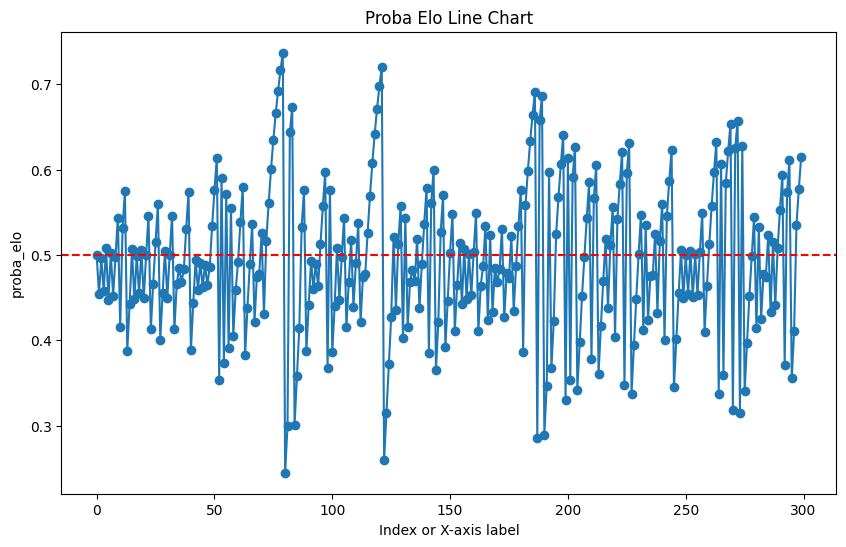

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设您的 DataFrame 名为 ranking_elo
# 请确保已经导入了 pandas 并加载了 ranking_elo 数据

# 绘制折线图
plt.figure(figsize=(10, 6))  # 可选的，设置图形的尺寸

# 使用 ranking_elo DataFrame 中的 "proba_elo" 列来绘制折线图
plt.plot(ranking_elo.index, ranking_elo["proba_elo"], marker='o', linestyle='-')

# 添加标签和标题
plt.xlabel("Index or X-axis label")  # 设置X轴标签
plt.ylabel("proba_elo")  # 设置Y轴标签
plt.title("Proba Elo Line Chart")  # 设置图表标题

# 在y = 0.5的位置绘制一条水平线
plt.axhline(y=0.5, color='red', linestyle='--', label='Y=0.5')


# 显示图形
plt.show()


In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

def compute_elo_rankings(data):
    """
    给定按时间顺序排列的比赛列表，对于每场比赛，在比赛开始之前计算两位选手的Elo排名。
    """
    print("Elo排名计算中...")
    data = pd.read_excel("F:/about/math_modeling/2.2/processed_data.xlsx")  # 请替换为您的数据集文件路径

    # 将所有参赛选手的名称合并到一个列表中，然后使用value_counts来计数每个选手出现的次数，并获取索引（即选手的名称），这样可以得到不重复的选手列表
    players = list(pd.Series(list(data.player1) + list(data.player2)).value_counts().index)
    # 为每位选手初始化一个Elo分数为1500的序列，1500是Elo系统中的常用初始值
    elo = pd.Series(np.ones(len(players)) * 1500, index=players)
    # 初始化一个列表来存储每场比赛双方的Elo分数，第一场比赛前所有人都是1500
    ranking_elo = [(1500, 1500)]
    
    # 遍历数据中的每场比赛，更新选手的Elo分数
    for i in range(1, len(data)):
        # 获取当前比赛的胜者和败者名称
        w = data.iloc[i-1, :].Winner
        l = data.iloc[i-1, :].Loser
        # 获取胜者和败者当前的Elo分数
        elow = elo[w]
        elol = elo[l]
        # 计算胜者的胜率预期
        pwin = 1 / (1 + 10 ** ((elol - elow) / 400))
        # 设置胜者和败者的K因子，这个因子决定了Elo分数的变动幅度，标准值为32
        K_win = 32
        K_los = 32
        # 根据比赛结果更新胜者和败者的Elo分数
        new_elow = elow + K_win * (1 - pwin)
        new_elol = elol - K_los * (1 - pwin)
        elo[w] = new_elow
        elo[l] = new_elol
        # 将更新后的Elo分数添加到列表中
        ranking_elo.append((elo[data.iloc[i, :].Winner], elo[data.iloc[i, :].Loser]))
        # 每计算5000场比赛就打印一次进度
        if i % 5000 == 0:
            print(str(i) + "场比赛已计算...")
    # 将Elo分数列表转换为DataFrame，方便后续处理和分析
    ranking_elo = pd.DataFrame(ranking_elo, columns=["elo_winner", "elo_loser"])
    # 计算每场比赛中胜者对败者的胜率预期
    ranking_elo["proba_elo"] = 1 / (1 + 10 ** ((ranking_elo["elo_loser"] - ranking_elo["elo_winner"]) / 400))
    # 返回包含每场比赛双方Elo分数及胜率预期的DataFrame
    return ranking_elo
